#**EDA on Retail Sales Data**

**Description:**
In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

**Key Concepts and Challenges:**
####1.Data Loading and Cleaning: Load the retail sales dataset.
####2.Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
####3.Time Series Analysis: Analyze sales trends over time using time series techniques.
####4.Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
####5.Visualization: Present insights through bar charts, line plots, and heatmaps.
####6.Recommendations: Provide actionable recommendations based on the EDA.

**Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Data Loading**

In [3]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.columns #column names

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df.isnull().sum() #checking for null values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
df.dtypes #data types

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

**Data Cleaning**

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) #converting date column to datetime datatype

In [ ]:
df['Month'] = df['Date'].dt.month_name() #extracting month name from date column
df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

**Descriptive Statistics**

In [ ]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


**Time Series Analysis**

What are the monthly sales trends over the past year?


In [ ]:
monthysales = df.resample('M', on='Date').sum()['Total Amount']
monthysales

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: M, Name: Total Amount, dtype: int64

**Visualization**

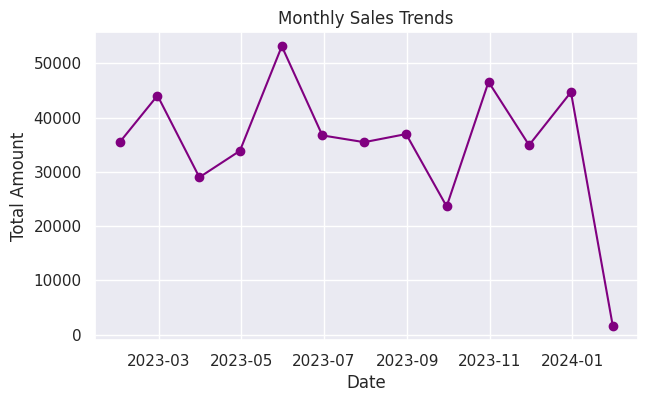

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(monthysales.index, monthysales.values, marker = 'o',color = 'purple')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Monthly Sales Trends')
plt.show()

The chart shows that sales have been volatile over the past year, with no clear pattern of growth or decline.
The highest sales occurred in March 2023 followed by a slight decline in April and May, then a significant increase in June.

What are sales trend over the year?

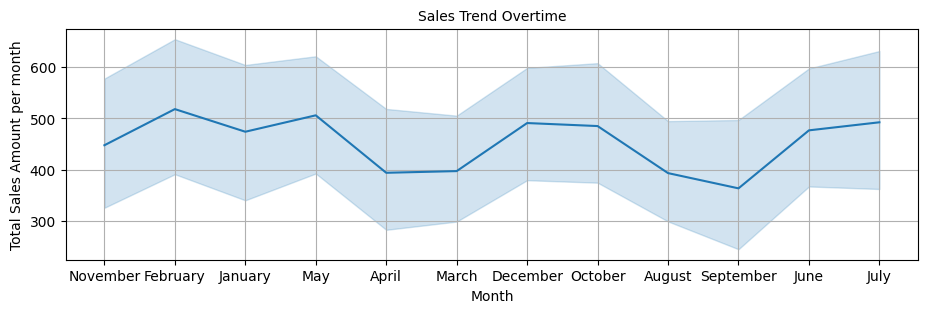

In [ ]:
plt.figure(figsize=(11,3))
sns.lineplot(x='Month', y='Total Amount', data= df)
plt.grid(True)
plt.title('Sales Trend Overtime', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total Sales Amount per month', fontsize=10)
plt.show()

What are the transaction over the months?

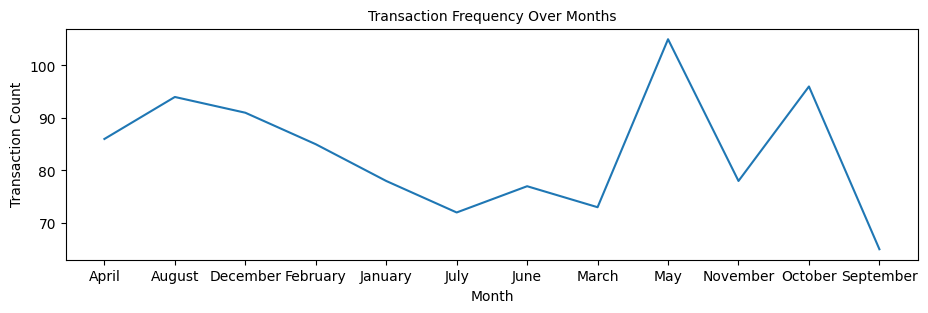

In [ ]:
transaction_count = df.groupby('Month')['Transaction ID'].count()


plt.figure(figsize=(11,3))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Transaction Count', fontsize=10)
plt.show()

**Customer and Product Analysis**

What are the Sale of product category per month?

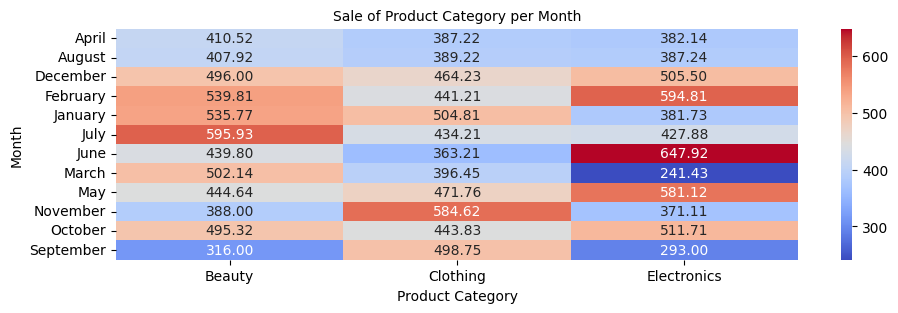

In [ ]:
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(11,3))
sns.heatmap(heatmap, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Sale of Product Category per Month', fontsize=10)
plt.xlabel('Product Category', fontsize=10)
plt.ylabel('Month', fontsize=10)
plt.show()


What is the distribution of customer by gender?

In [ ]:
dis_cust_by_gender =df.groupby('Gender')['Customer ID'].nunique()
dis_cust_by_gender

Gender
Female    510
Male      490
Name: Customer ID, dtype: int64

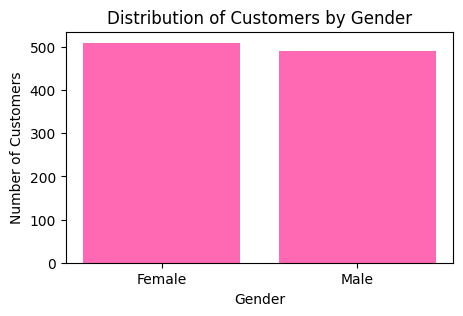

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(dis_cust_by_gender.index, dis_cust_by_gender.values, color ='hotpink')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Gender')
plt.show()

What is the age distribution of the customers?

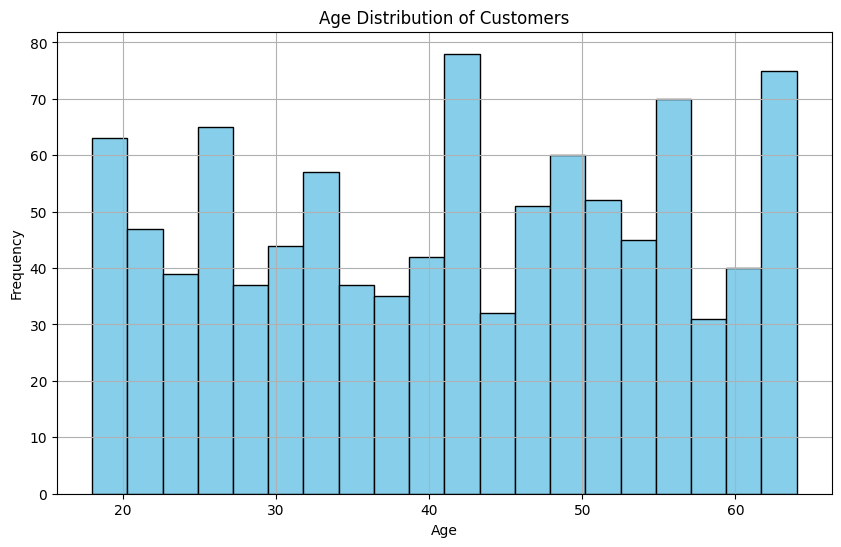

In [ ]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What are the average spending amount by gender?

In [ ]:
avg_spend_by_gender = df.groupby('Gender')['Total Amount'].mean()
avg_spend_by_gender

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

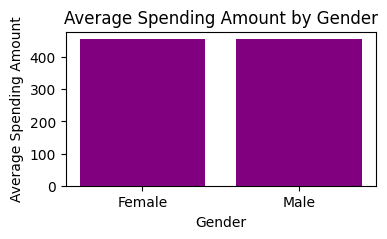

In [ ]:
plt.figure(figsize=(4,2))
plt.bar(avg_spend_by_gender.index, avg_spend_by_gender.values, color = 'purple')
plt.xlabel('Gender')
plt.ylabel('Average Spending Amount')
plt.title('Average Spending Amount by Gender')
plt.show()

What are the top selling product category?

In [ ]:
top_selling_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_selling_category


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

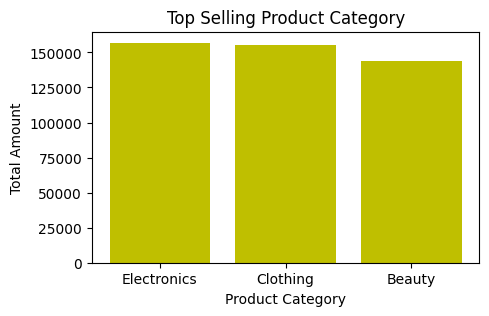

In [ ]:
plt.figure(figsize=(5, 3))
plt.bar(top_selling_category.index, top_selling_category.values, color ='y')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.title('Top Selling Product Category')
plt.show()

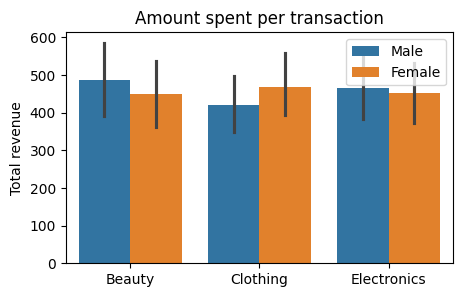

In [5]:
plt.figure(figsize=(5, 3))
sns.barplot(x="Product Category", y="Total Amount", hue="Gender", data=df)

# Customize the plot
plt.title("Amount spent per transaction")
plt.xlabel("")
plt.ylabel("Total revenue")
plt.legend(loc='upper right')
plt.show()

In [ ]:
product_count = df['Product Category'].value_counts()
product_count

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [ ]:
pct_product_count = (product_count / product_count.sum()) * 100
pct_product_count

Product Category
Clothing       35.1
Electronics    34.2
Beauty         30.7
Name: count, dtype: float64

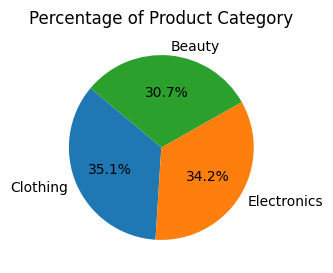

In [ ]:
plt.figure(figsize=(5, 3))
plt.pie(pct_product_count, labels=pct_product_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Product Category')
plt.show()

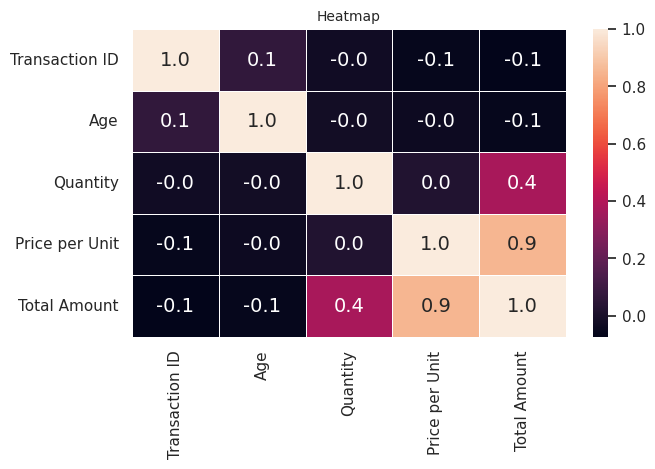

In [ ]:
correlation=df[df.dtypes[df.dtypes == 'int64'].index].corr()
sns.set(font_scale=1)
plt.figure(figsize = (7,4))
plt.title("Heatmap", fontsize=10)
ax = sns.heatmap(correlation, annot=True,annot_kws={"size": 14},fmt='.1f', linewidths=.5)

**Overall Key Insights**

While clothing is the best-selling category in terms of quantity, electronics generates the most revenue, closely followed by clothing.

**Clothing:** This category generates the most revenue for women. Men purchase more than women in terms of quantity but spend less on average in this category.

**Electronic:** This categoty men buy less than women in terms of quantity, but spend more on average in this category.

**Beauty:** This is the category with the lowest revenue and the lowest sales. In this category, revenue is higher for women than for men.

**Recommendation**

**Focus on Electronics:** People spend more money on electronics than anything else. Sell more expensive electronics and offer good service.

**Boost Clothing Sales:** Encourage people to buy more clothes each time they shop. Offer special deals or suggest extra items.

**Improve Beauty Sales:** Find out what people want in beauty products. Sell more different kinds and target women with special offers.

**Know Your Customers:** Learn who buys what. Offer things people like and suggest products based on what they already bought.

**Keep Watching:** Always check what people are buying. Change your plans if needed to keep making money.